# Individual assignment 3: ODE's 
## By Dima Mohsin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

Q1) In order to keep track of the parameters and the initial condition values I created a dictionary and divided parameters according to their functions. I also added intial conditions in a list. 

In [41]:
#Reaction rates values definition in h^-1
parameters = {
    'Transcription_rates': {
        'alpha_A': 50,
        'alpha_prime_A': 500, 
        'alpha_R': 0.01,
        'alpha_prime_R': 50
    },
    'Degradation_rates': {
        'delta_MA': 10,
        'delta_MR': 0.5, 
        'delta_A': 1, 
        'delta_R': 0.2
    },
    'Binding_rates': {
        'gamma_A': 1,  # mol^-1 h^-1
        'gamma_R': 1,  # mol^-1 h^-1
        'gamma_C': 2   # mol^-1 h^-1
    },
    'Unbinding_rates': {
        'theta_A': 50, 
        'theta_R': 100
    },
    'Translation_rates': {
        'beta_A': 50, 
        'beta_R': 5
    }
}
#Initial conditions values

initial_conditions = [1,1,0,0,0,0,0,0,0]             

In [43]:
#Calculations 
def rhs_circadian(t,y):
    
    alpha_A = parameters['Transcription_rates']['alpha_A']  #unpack parameters
    alpha_R = parameters['Transcription_rates']['alpha_R']
    alpha_prime_A = parameters['Transcription_rates']['alpha_prime_A']
    alpha_prime_R = parameters['Transcription_rates']['alpha_prime_R']
    
    delta_MA = parameters['Degradation_rates']['delta_MA']    
    delta_MR = parameters['Degradation_rates']['delta_MR']
    delta_A = parameters['Degradation_rates']['delta_A']
    delta_R = parameters['Degradation_rates']['delta_R']

    gamma_A = parameters['Binding_rates']['gamma_A']
    gamma_R = parameters['Binding_rates']['gamma_R']
    gamma_C = parameters['Binding_rates']['gamma_C']

    theta_A = parameters['Unbinding_rates']['theta_A']
    theta_R = parameters['Unbinding_rates']['theta_R']

    beta_A = parameters['Translation_rates']['beta_A']
    beta_R = parameters['Translation_rates']['beta_R']

    
    DA, DR, D_prime_A, D_prime_R, MA, MR, A, R, C = y #unpack state variables

    #Equations
    dDA_dt = theta_A*D_prime_A - gamma_A*DA*A 
    dDR_dt = theta_R*D_prime_R - gamma_R*DR*A 
    dDprimeA_dt = gamma_A*DA*A - theta_A*D_prime_A 
    dDprimeR_dt = gamma_R*DR*A - theta_R*D_prime_R 
    dMA_dt = alpha_prime_A*D_prime_A + alpha_A*DA - delta_MA*MA 
    dA_dt = beta_A*MA + theta_A*D_prime_A + theta_R*D_prime_R - A*(gamma_A*DA + gamma_R*DR+ gamma_C*R + delta_A) 
    dMR_dt = alpha_prime_R*D_prime_R + alpha_R*DR - delta_MR*MR
    dR_dt = beta_R*MR - gamma_C*A*R + delta_A*C - delta_R*R
    dC_dt = gamma_C*A*R - delta_A*C
    return dDA_dt, dDR_dt, dDprimeA_dt, dDprimeR_dt, dMA_dt, dMR_dt, dA_dt, dR_dt, dC_dt
    

The time it took for the time explicit method RK45 is 31.50591492652893s


Text(0, 0.5, 'Repressor (R)')

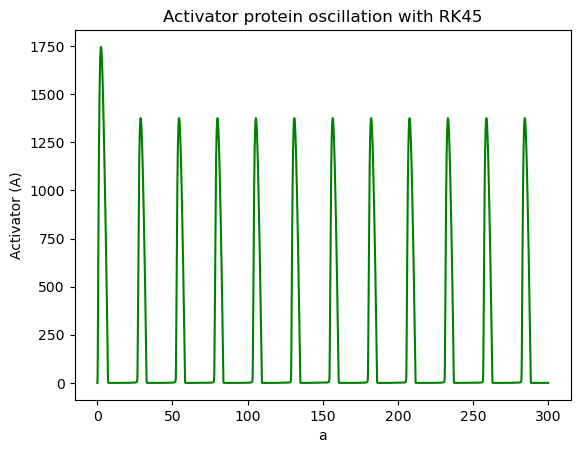

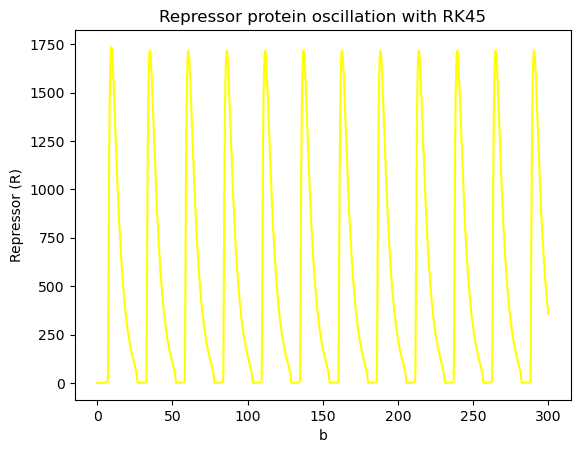

In [45]:
#ODE time explicit method 
tspan = [0, 300] #Limits time span in hours
start = time.time()
sol = solve_ivp(rhs_circadian, tspan, initial_conditions, method = 'RK45')
end = time.time()
time_RK45 = (f'The time it took for the time explicit method RK45 is {end-start}s')
print(time_RK45)

plt.plot(sol.t, sol.y[-3], color='green')
plt.title('Activator protein oscillation with RK45')
plt.xlabel('a')
plt.ylabel('Activator (A)')
plt.figure()
plt.plot(sol.t, sol.y[-2], color='yellow')
plt.title('Repressor protein oscillation with RK45')
plt.xlabel('b')
plt.ylabel('Repressor (R)')

Plot a shows how the activator protein oscillates. In figure b we can see how the repressor protein oscillates. These plots show when we use RK45 which took 33 seconds. For the activator plot a, the inital hour 0 activator protein is peaked at 1750 and each 25 hours that passes it peaks to ca 1400 and flatten to 0 again till another 25 hours have been reached again. This can be explained in the repressor plot b, the repressor peaks and takes 25hours before it wears off.  Once the repressor wears off, the activator peaks again as seen in plot a. 


Q2) Checking if ODE is stiff using by timing the implicit method BDF

The time it took for the time implicit method BDF is 0.17557120323181152s


Text(0, 0.5, 'Repressor (R)')

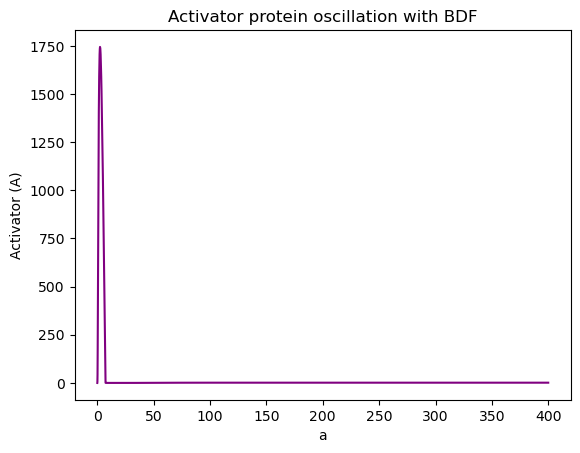

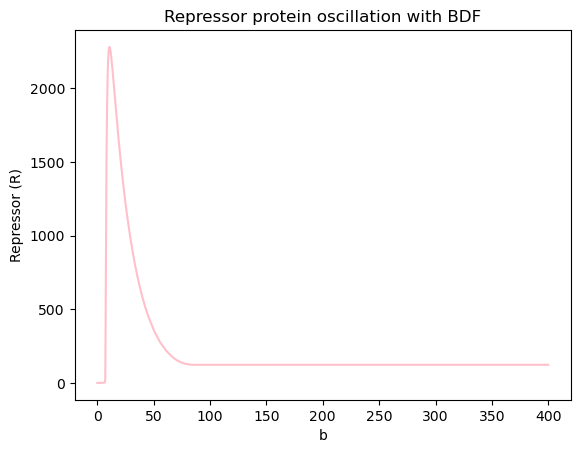

In [27]:
#ODE time implicit method BDF
tspan = [0, 400] #Limits time span in hours
start = time.time()
sol = solve_ivp(rhs_circadian, tspan, initial_conditions, method = 'BDF')
end = time.time()
time_BDF = (f'The time it took for the time implicit method BDF is {end-start}s')
print(time_BDF)
plt.plot(sol.t, sol.y[-3], color='purple')
plt.title('Activator protein oscillation with BDF')
plt.xlabel('a')
plt.ylabel('Activator (A)')
plt.figure()
plt.plot(sol.t, sol.y[-2], color='pink')
plt.title('Repressor protein oscillation with BDF')
plt.xlabel('b')
plt.ylabel('Repressor (R)')

Plot a shows how the activator protein oscillates. In figure b we can see how the repressor protein oscillates. These plots show when we use BDF which is a time implicit method. We can see that the implicit BDF method took 1.0 second to run which is about 30x faster compared to the explicit method RK45. This implies that the ODE system for oscillation of repressor and activator proteins is stiff. I would choose the BDF method as it is faster and more reliable for the ODE calculation. The implicit methods are stable as they can have larger steps/ gaps between time steps and still maintain accuracy throughout the calculation process making the calculations and stable while being faster. Explicit methods require small steps making them slower and more expensive as seen in this example. When an explicit method is used for a stiff ODE it gets slower when compared to an implicit method as seen in this example and hence is more expensive and time consuming. 

The time it took for LSODA is 0.39881014823913574s


Text(0, 0.5, 'Repressor (R)')

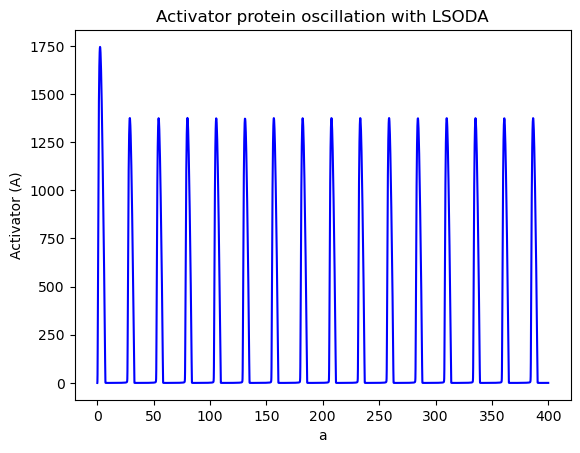

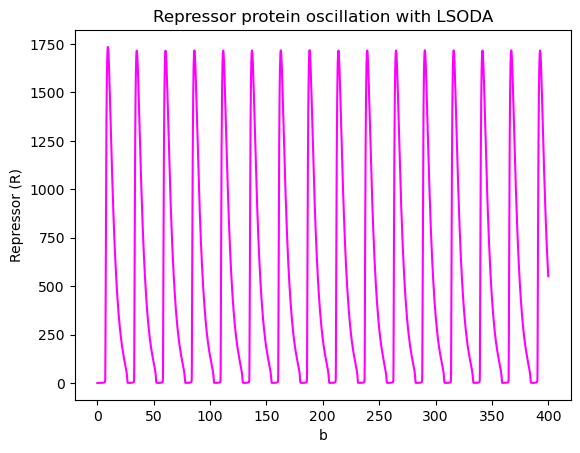

In [14]:
#ODE with LSODA for fun
tspan = [0, 400] #Limits time span in hours
start = time.time()
sol = solve_ivp(rhs_circadian, tspan, initial_conditions, method = 'LSODA')
end = time.time()
time_BDF = (f'The time it took for LSODA is {end-start}s')
print(time_BDF)
plt.plot(sol.t, sol.y[-3], color='blue')
plt.title('Activator protein oscillation with LSODA')
plt.xlabel('a')
plt.ylabel('Activator (A)')
plt.figure()
plt.plot(sol.t, sol.y[-2], color='magenta')
plt.title('Repressor protein oscillation with LSODA')
plt.xlabel('b')
plt.ylabel('Repressor (R)')

LSODA is faster than the implicit method BDF as it took ca 0.3 seconds. It can detect if an explicit solver or implicit solver is needed and hence is more optimal. 